In [1]:
import json

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Paste your path to signal here
PATH_TO_SIGNAL = r"D:\Datasets\lab\X\X_26_ph0.npy"
PATH_TO_HEARTBEAT_LOCATIONS = r"D:\Datasets\lab\Y\Y_26_ph0.json"

signal = np.load(PATH_TO_SIGNAL, mmap_mode='r')
with open(PATH_TO_HEARTBEAT_LOCATIONS, 'r') as in_:
    heartbeat_locations = json.load(in_)

In [9]:
list(map(len, heartbeat_locations))

[1970,
 1970,
 1970,
 0,
 0,
 0,
 1961,
 134,
 1970,
 0,
 0,
 0,
 1960,
 1970,
 1970,
 1970,
 0,
 0,
 0,
 0,
 1959,
 1970,
 1970,
 1970,
 0,
 0,
 0,
 0,
 1964,
 1970,
 1970,
 1970,
 0,
 0,
 0,
 0,
 1962,
 1970,
 1970,
 1970,
 0,
 0,
 0,
 0,
 1970,
 1970,
 1970,
 1970,
 0,
 0,
 0,
 0,
 1970,
 1970,
 1970,
 0,
 0,
 0,
 1970,
 1970,
 1970,
 0,
 0,
 0]

In [4]:
len(signal[0])

2975500

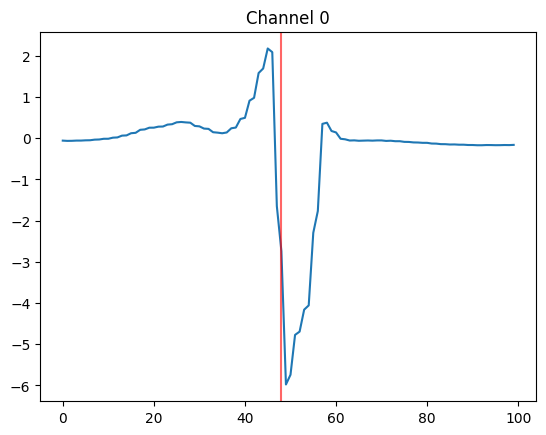

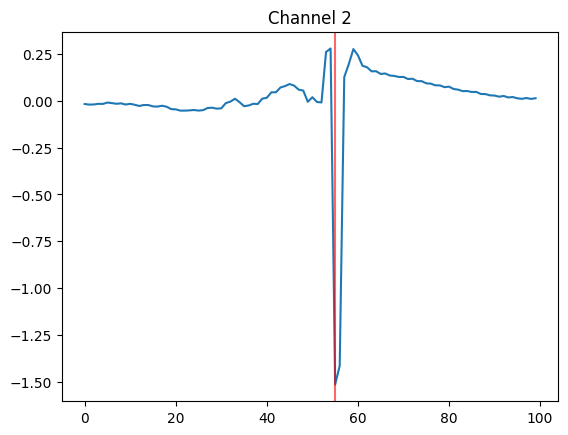

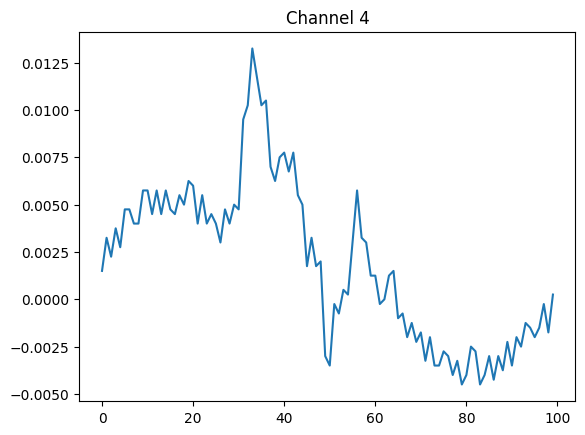

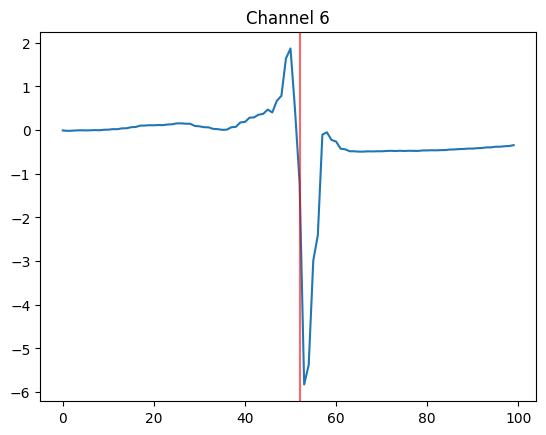

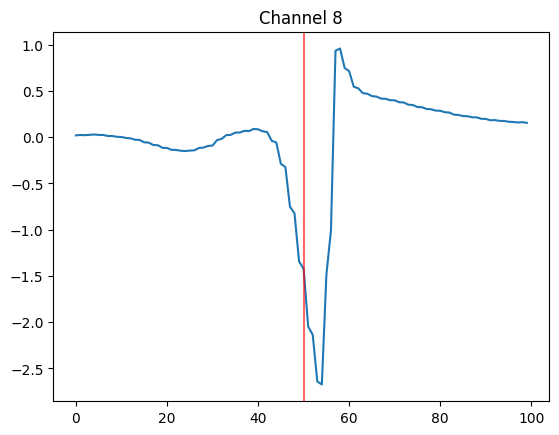

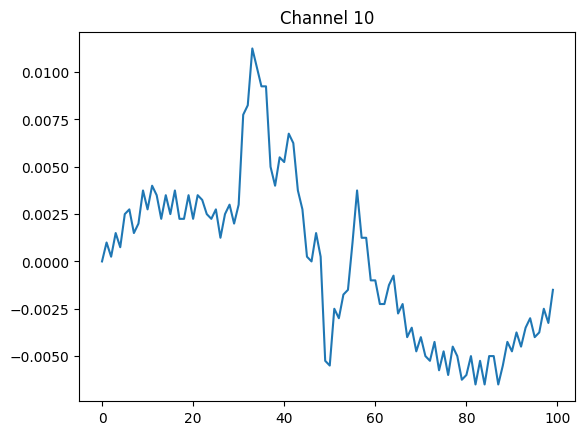

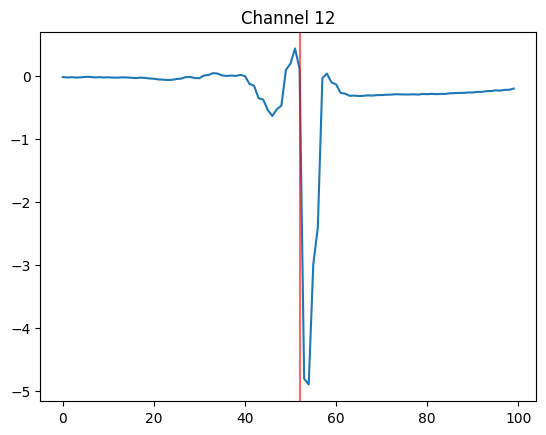

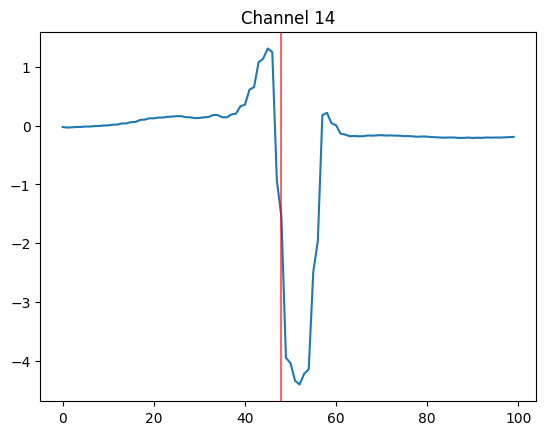

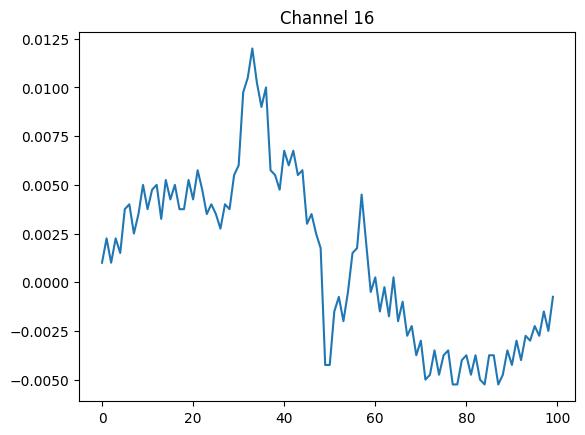

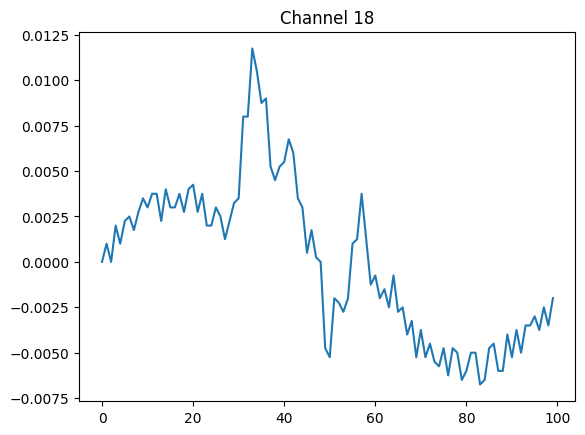

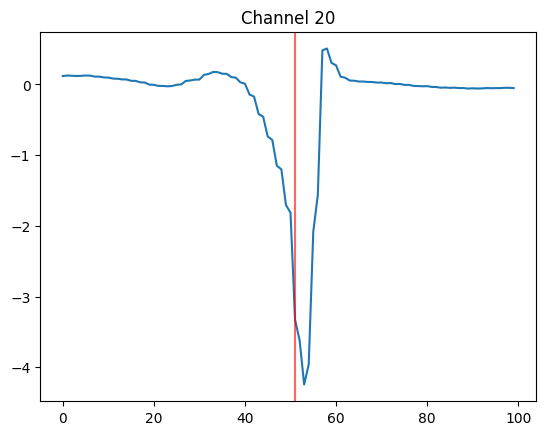

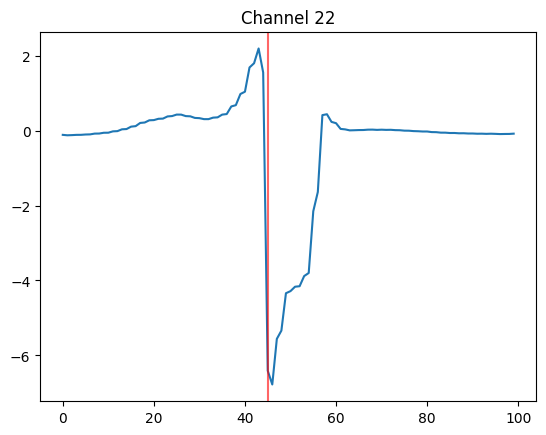

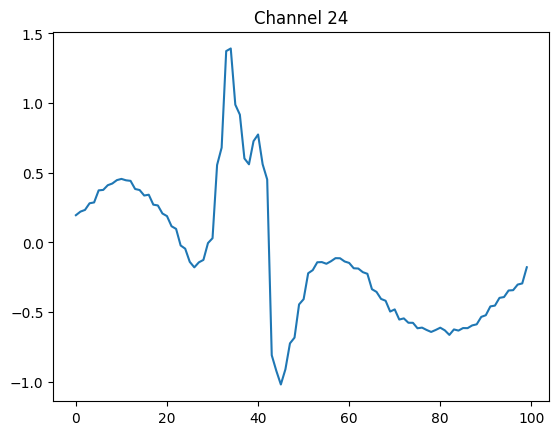

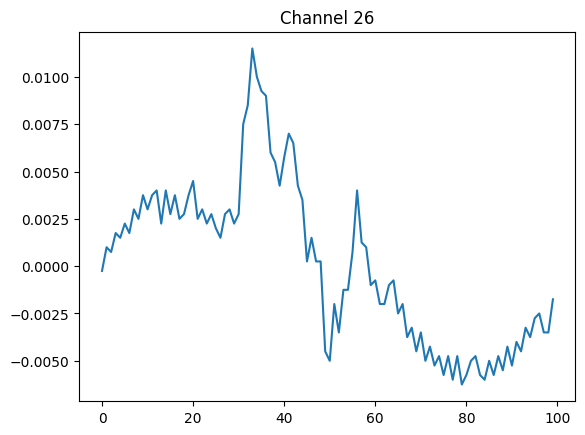

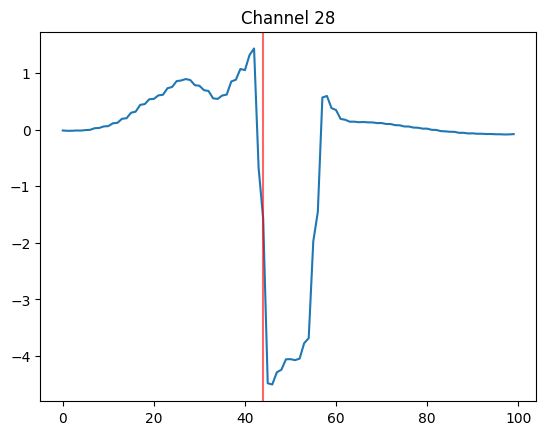

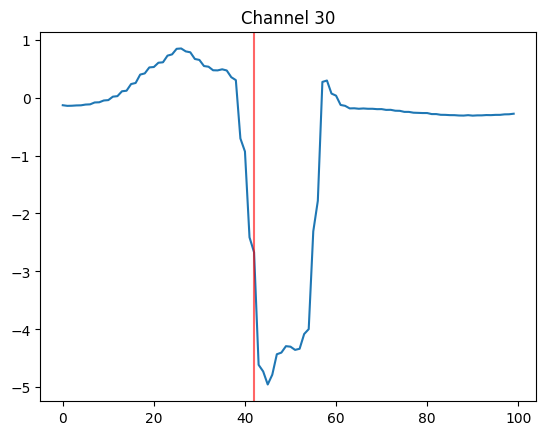

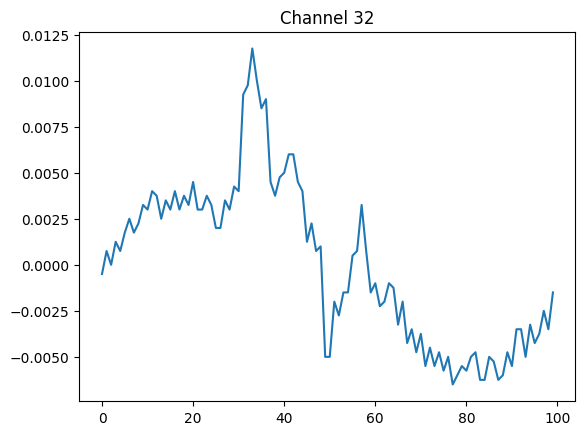

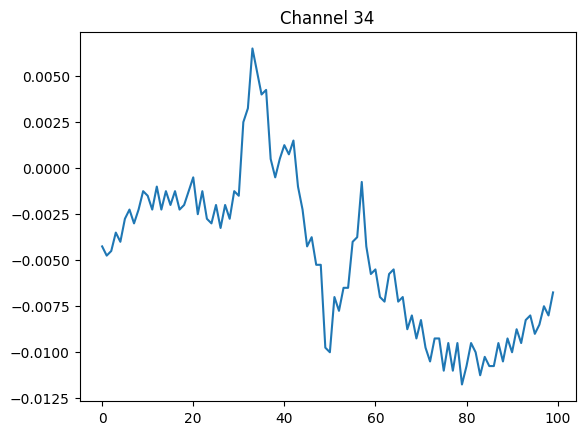

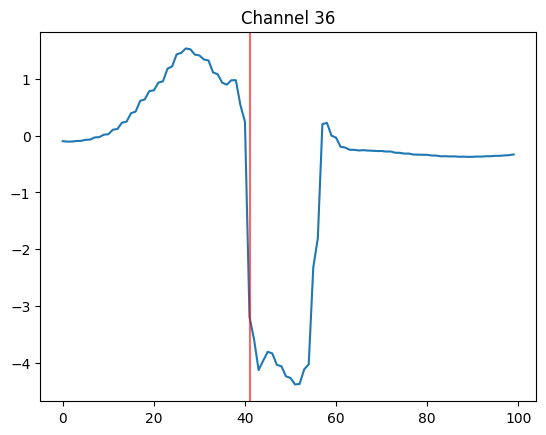

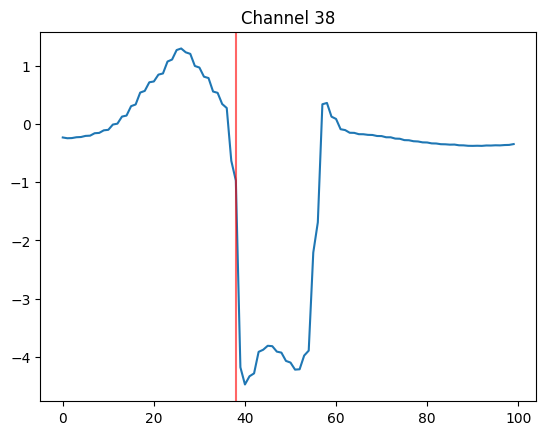

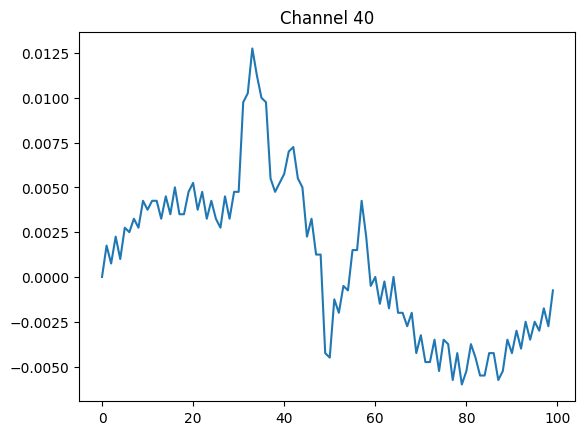

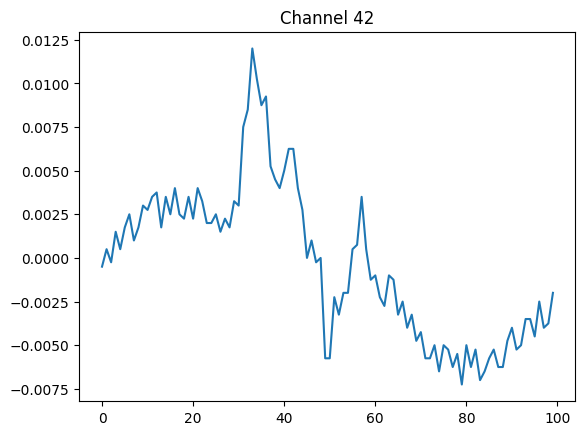

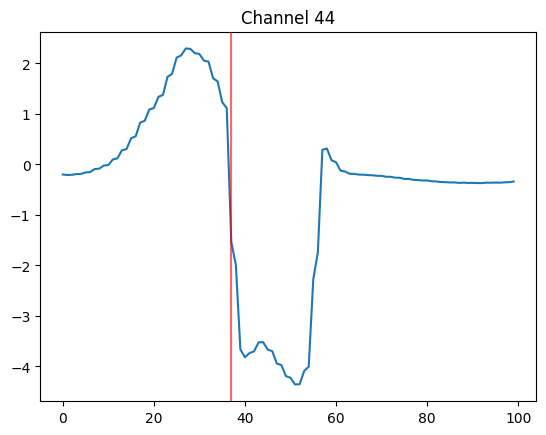

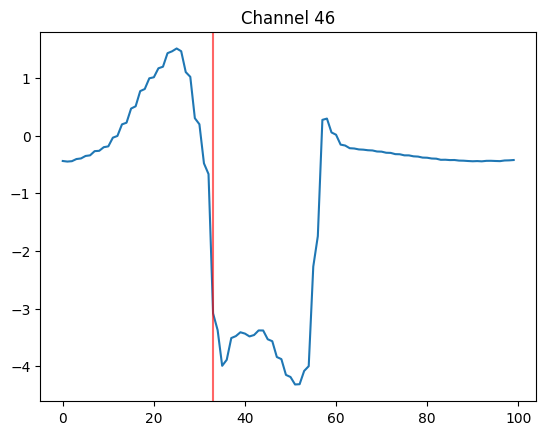

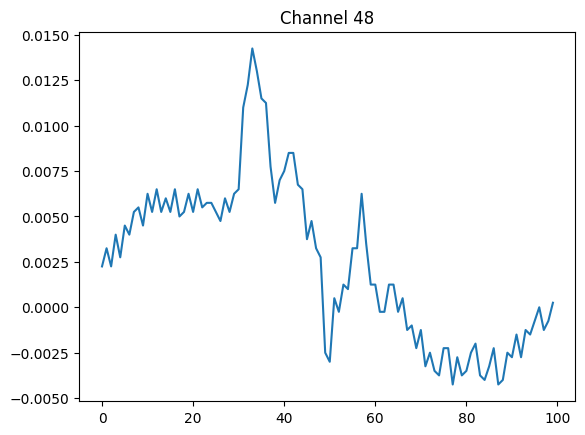

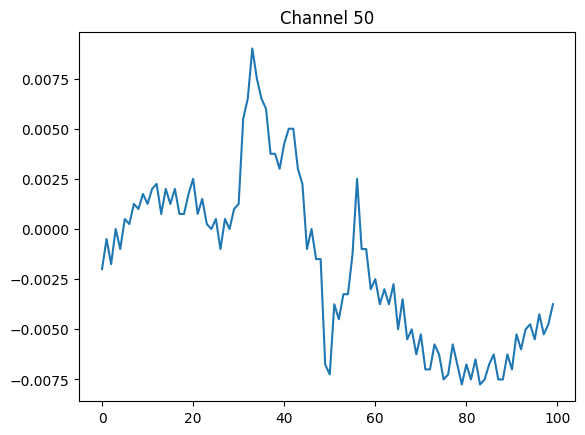

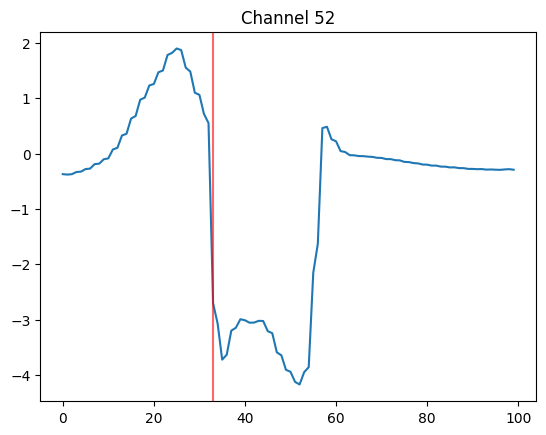

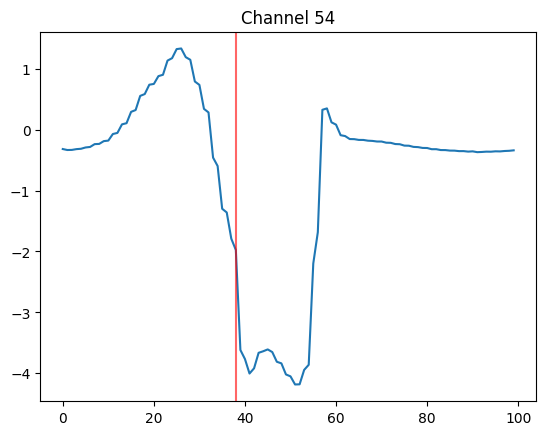

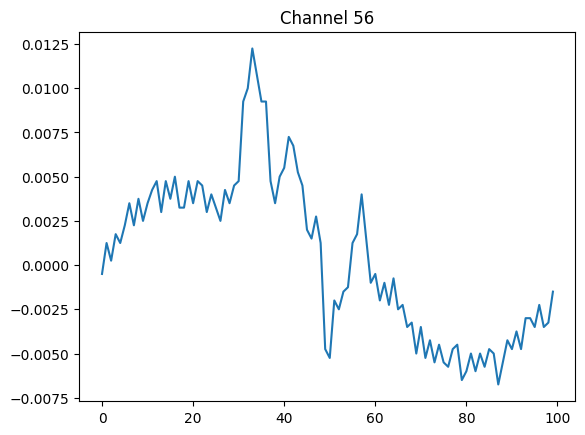

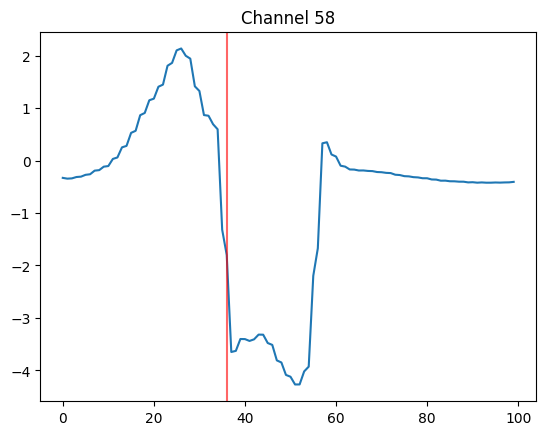

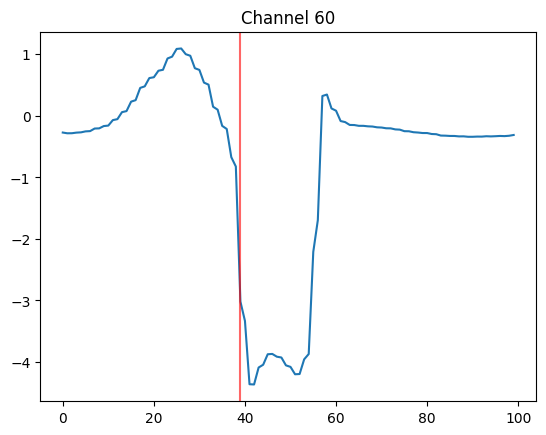

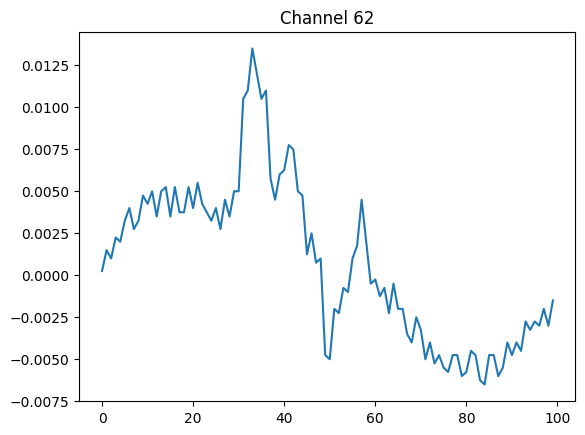

In [5]:
num_points = 100
start = 3950
channel = 2

for channel in range(0, 64, 2):
    # Plot xs
    plt.plot(range(num_points), signal[channel][start:num_points + start])

    # Plot ys
    for heartbeat_location in heartbeat_locations[channel]:
        if 0 < (skewed_heartbeat_location := heartbeat_location - start) < num_points:
            plt.axvline(skewed_heartbeat_location, color='red', alpha=0.6)

    plt.title(f"Channel {channel}")
    plt.show()